# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Supervised Learning - Foundations/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
df.shape

(3454, 15)

##Observation:

- There are 3454 rows and 15 columns in the data

In [ ]:
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

##Observation:

- The release_year and days_used columns are of int64 data type. There are four object type columns and the rest are all floats.

- From the non-null count, we can see that some columns have missing values as their total count does not total up to the total number of rows in the data frame

In [ ]:
data.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

##Observations:

- main_camera_mp column has the most missing values that total up to 179.
- int_memory and ram have the same missing number of missing values
- The target variable does not have missing values which is a good thing. Meaning we shall not lose any data by dropping rows.

In [ ]:
missing_main_camera = data[data["main_camera_mp"].isnull()]
missing_main_camera.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


In [ ]:
missing_main_camera["os"].value_counts()

Android    179
Name: os, dtype: int64

In [ ]:
missing_main_camera["brand_name"].value_counts()

Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Name: brand_name, dtype: int64

##Observations

- All devices that are missing main camera pixels values are Android devices but are of different brands.

In [ ]:
missing_selfie_camera = data[data["selfie_camera_mp"].isnull()]
missing_selfie_camera.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


##Observations

- There are only two missing values in the selfie_camera_mp column
- All the devices have the same brand name Google and the same operating system Android

In [ ]:
missing_ram = data[data["ram"].isnull()]
missing_ram.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


##Observations:

- There are four missing values of RAM
- All the four missing values the Nokia Brand

In [ ]:
missing_weight= data[data["weight"].isnull()]
missing_weight.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


##Observations:

- All weight missing values are for brandname XOLO and Windows and Android OS devices

In [ ]:
missing_battery = data[data["battery"].isnull()]
missing_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511


##Observations:

- Most of the missing values are from Android Devices

- The brand names are different for most of the missing values.

- From my view, since companies tend to improve devices for every release year, to impute these missing values, I will group the devices according to brand name and year of release with the medians of the columns during data preprocessing

In [ ]:
data.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

##Observation:

- There are 34 different brand names
- There are 4 different operating systems
- Release_ year columns has 8 different values.

In [ ]:
data["brand_name"].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

##Observation:

- The brand name column has very many categories.
- In my opinion, during data preprocessing, I will have to drop this column since this information is summarized by another column called "os".
- The os column has fewer categories as seen below

In [ ]:
data["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

##Observation:

- Android operating system has the most count in the data frame. This implies that more Android phones are refurbished


In [ ]:
df.describe(include = ['category']).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='normalized_used_price', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='normalized_used_price', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='normalized_used_price', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['normalized_used_price'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['normalized_used_price'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

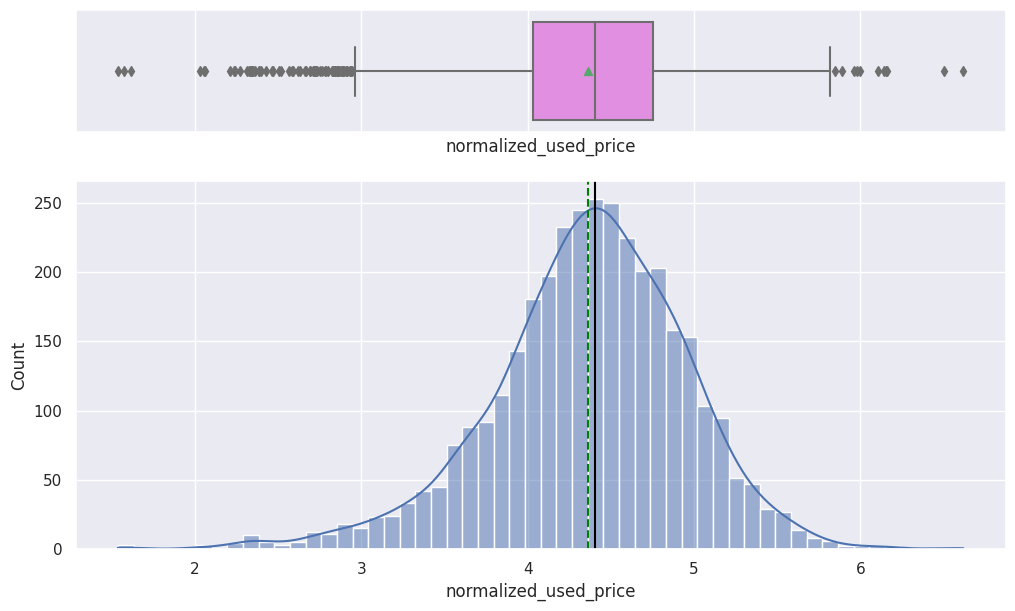

In [ ]:
histogram_boxplot(df, "normalized_used_price")

##Observations

- The distribution of used phone price is a normal distribution


In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='normalized_new_price', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='normalized_new_price', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='normalized_new_price', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['normalized_new_price'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['normalized_new_price'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

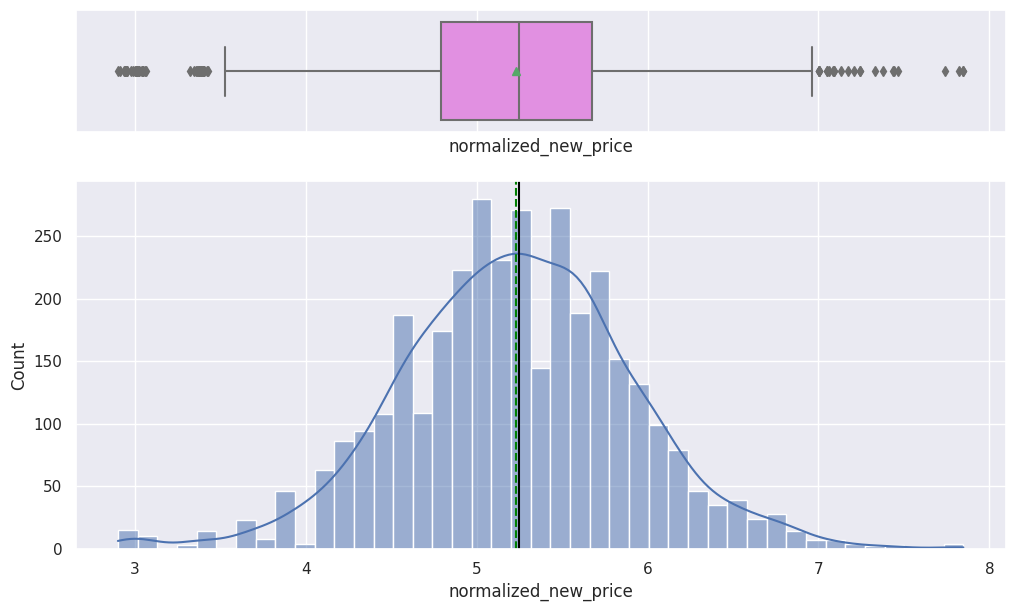

In [ ]:
histogram_boxplot(df,'normalized_new_price')

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='weight', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='weight', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='weight', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['weight'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['weight'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

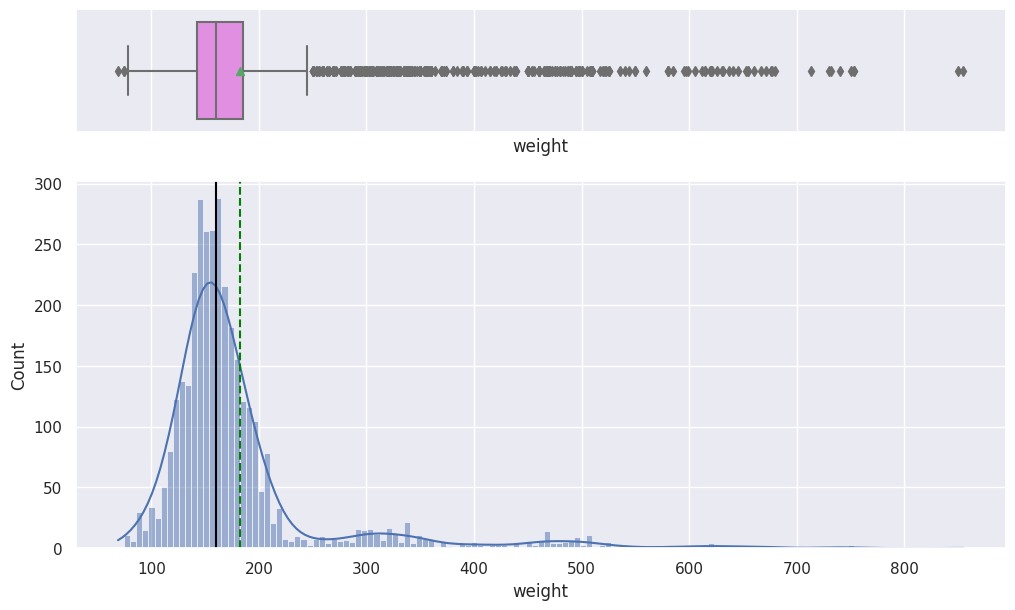

In [ ]:
histogram_boxplot(df, 'weight')

##Observation:

- The distribution is right skewed. Distribution has many outliers on the right side

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='battery', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='battery', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='battery', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['battery'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['battery'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

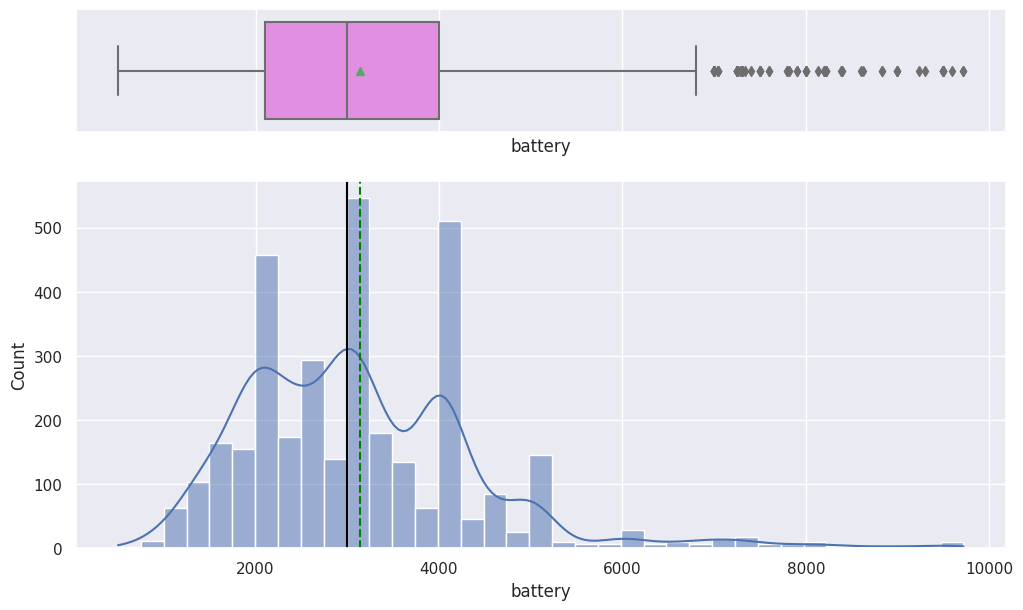

In [ ]:
histogram_boxplot(df, 'battery')

##Observation:

Battery is almost a normal distribution It has some outliers It has a median and mean around 3000 mAh



In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='screen_size', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='screen_size', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='screen_size', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['screen_size'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['screen_size'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

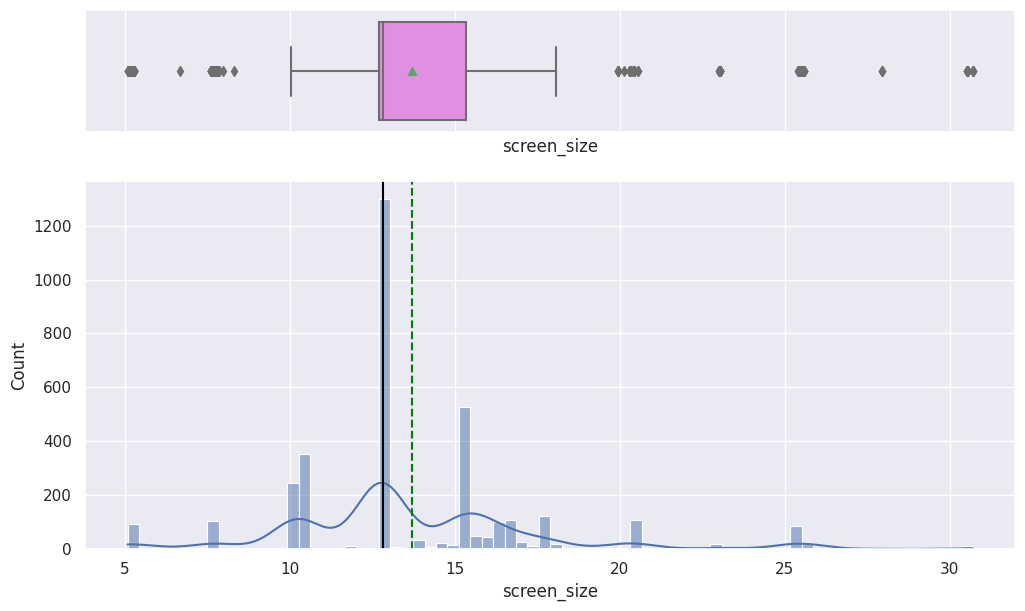

In [ ]:
histogram_boxplot(df, 'screen_size')

##Observation

- The distribution is een to be right skewed with outliers on both sides and a median about 15cm.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x='days_used', ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x='days_used', kde=True, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x='days_used', kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data['days_used'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data['days_used'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

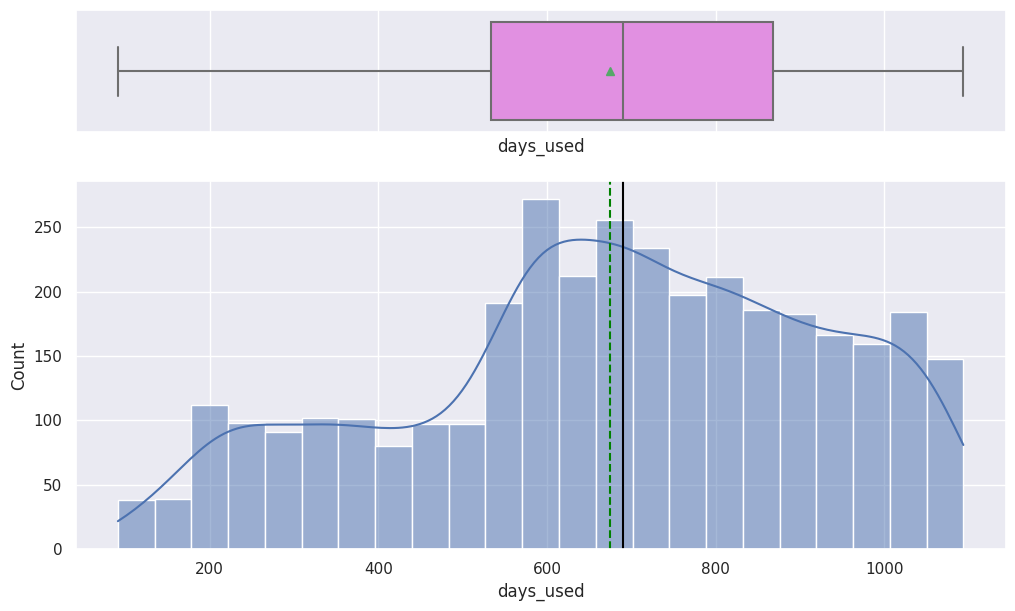

In [ ]:
histogram_boxplot(df, 'days_used')

##Observations:

- This distribution is skewed to the left and has a median of about 695 and a mean around 680 days.



In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()  #

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)

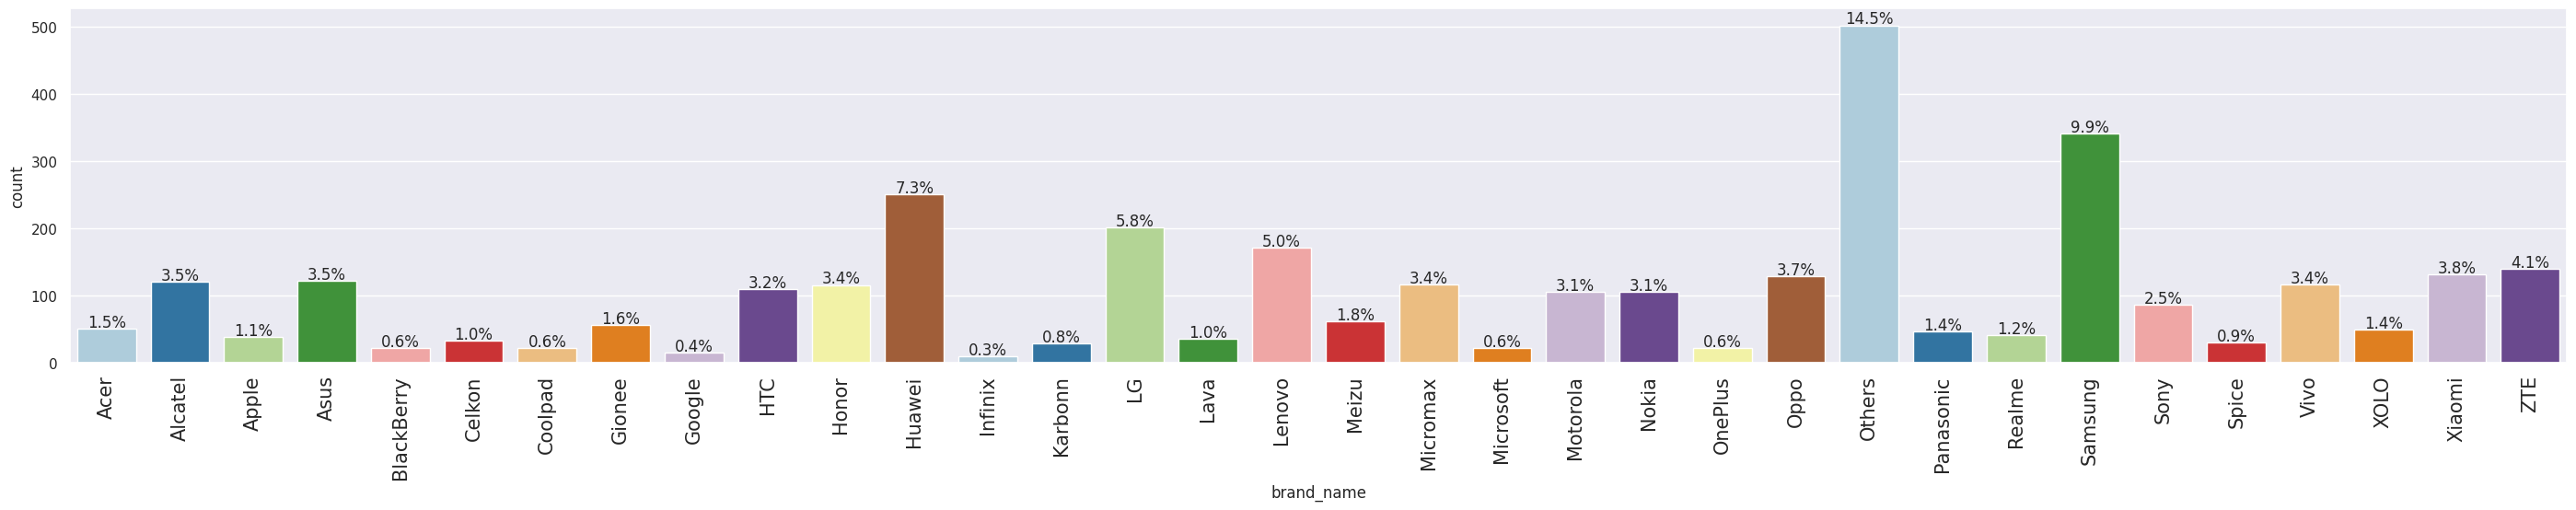

In [ ]:
labeled_barplot(df, "brand_name", perc=True)

##Observations:

- Most of the phones in the dataset are those with no known brand name Samsung is the highest represented known brand followed by Huawei.

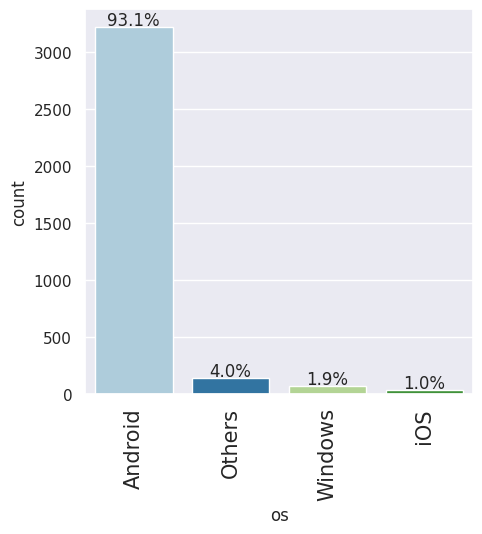

In [ ]:
labeled_barplot(df, "os", perc=True)

##Observations:

- Android has the highest percentage at 93.1% while IOS has the least percentage at 1.0%

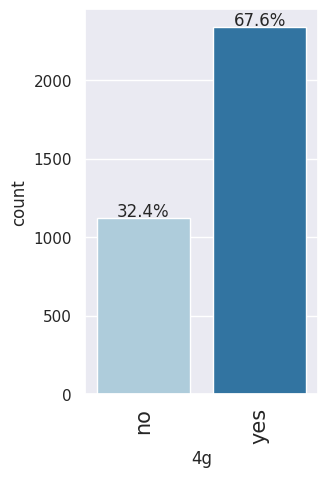

In [ ]:
labeled_barplot(df, "4g", perc=True)

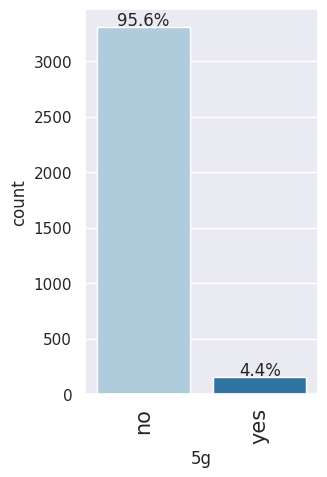

In [ ]:
labeled_barplot(df, "5g", perc=True)

In [ ]:
df["ram"].nunique()

12

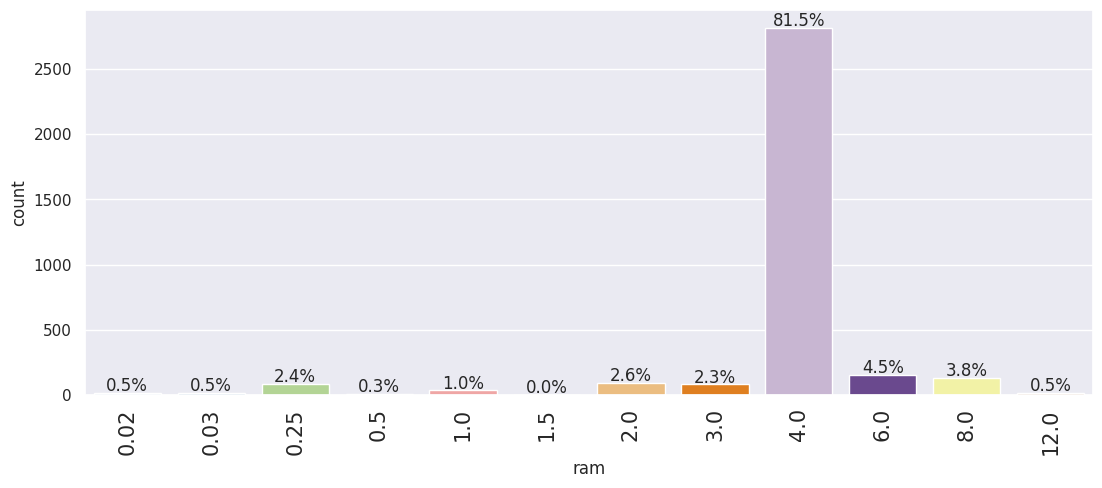

In [ ]:
labeled_barplot(df, "ram", perc=True)

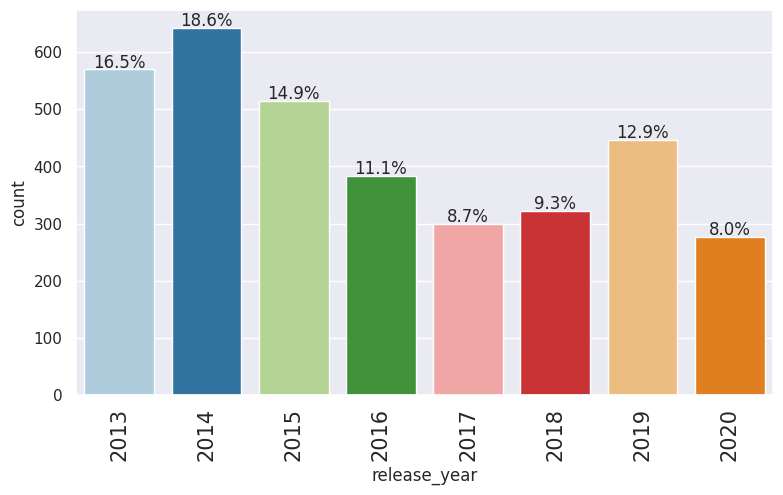

In [ ]:
labeled_barplot(df, "release_year", perc=True)

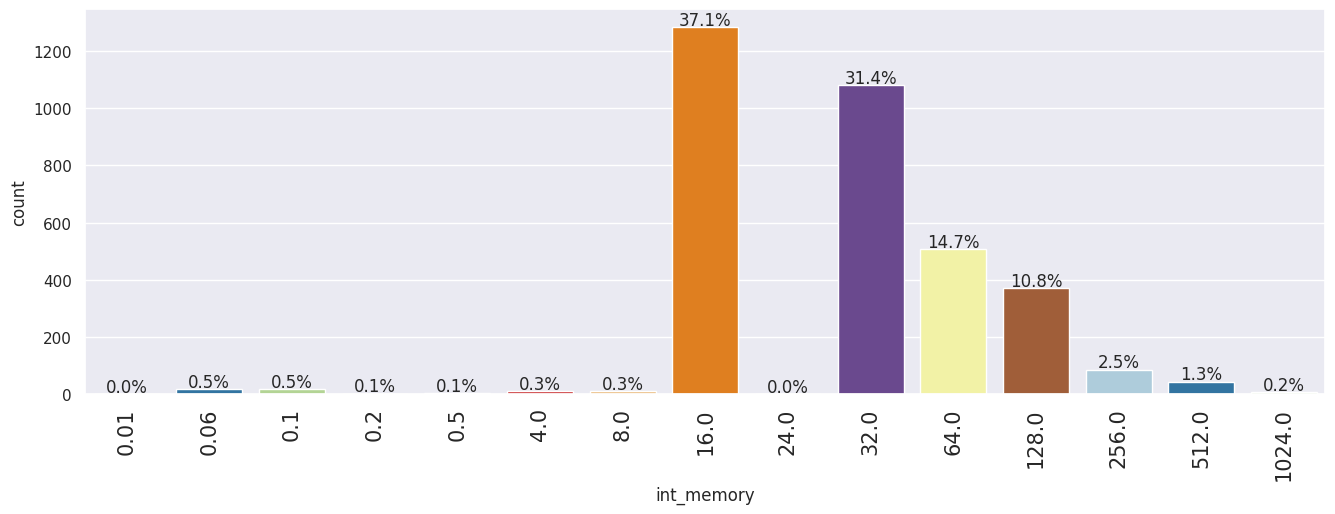

In [ ]:
labeled_barplot(df, "int_memory", perc=True)

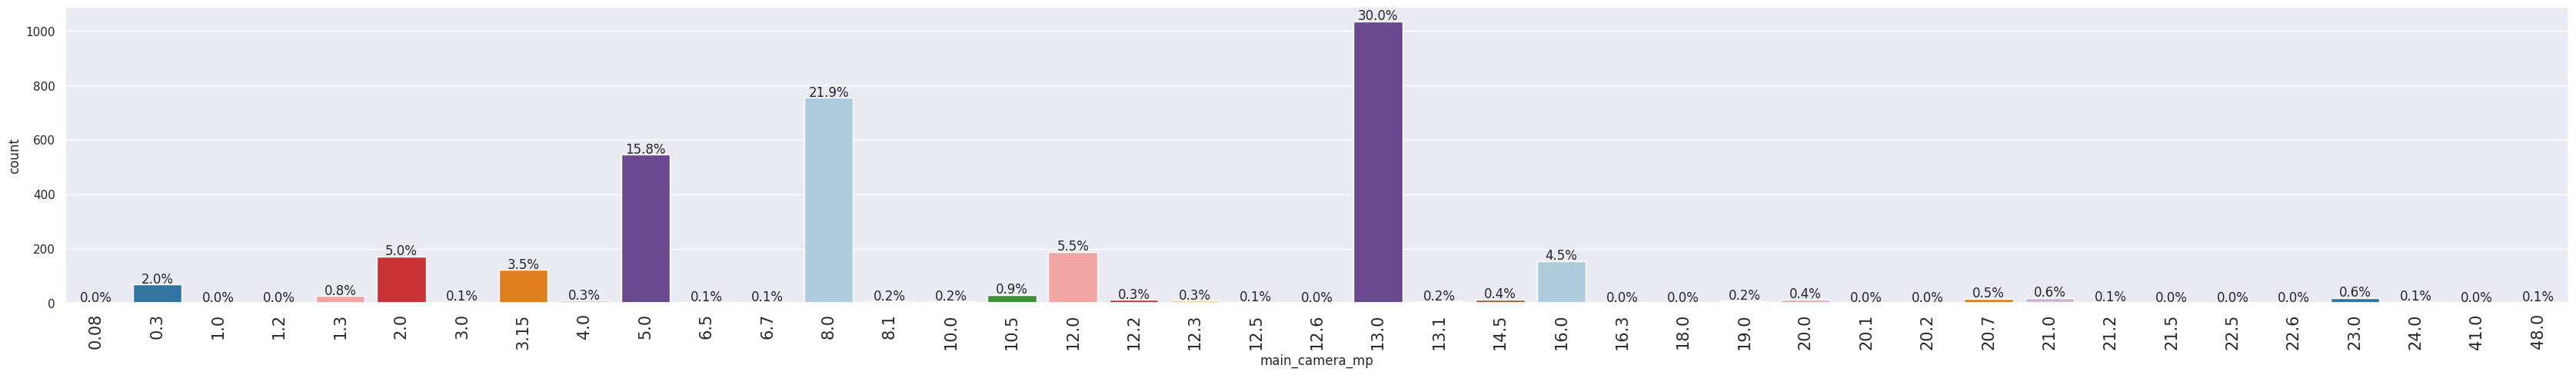

In [ ]:
labeled_barplot(df, "main_camera_mp", perc=True)

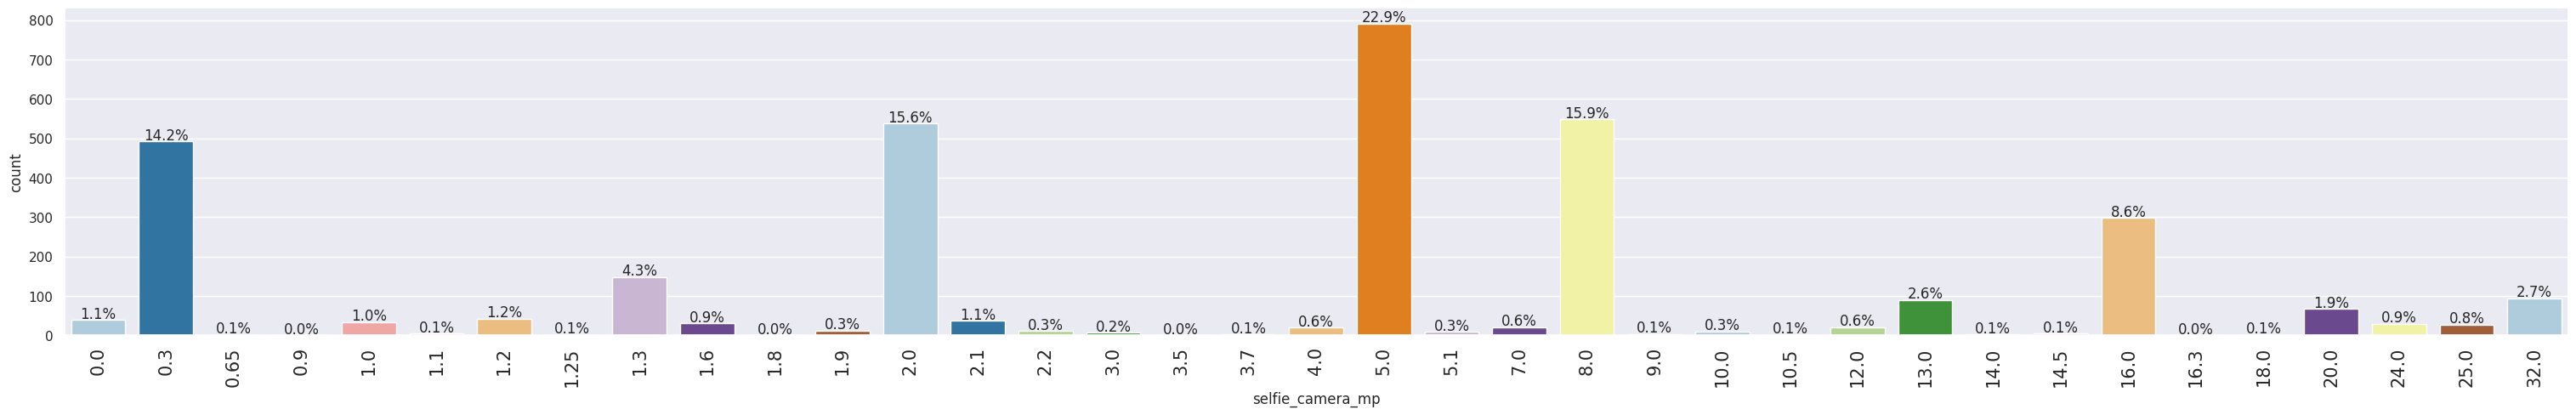

In [ ]:
labeled_barplot(df, "selfie_camera_mp", perc=True)

In [ ]:
df.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64

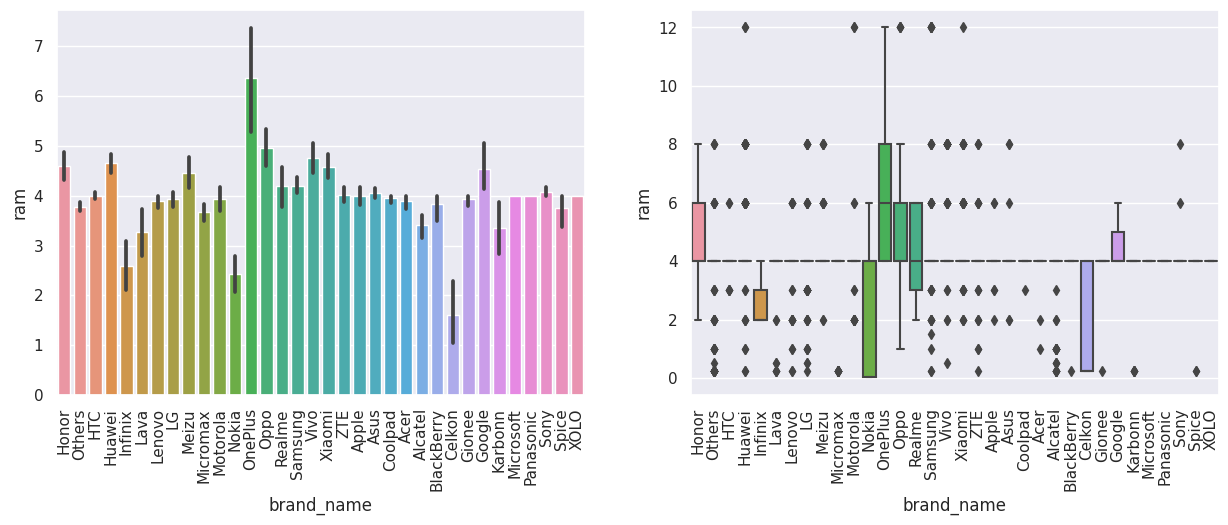

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

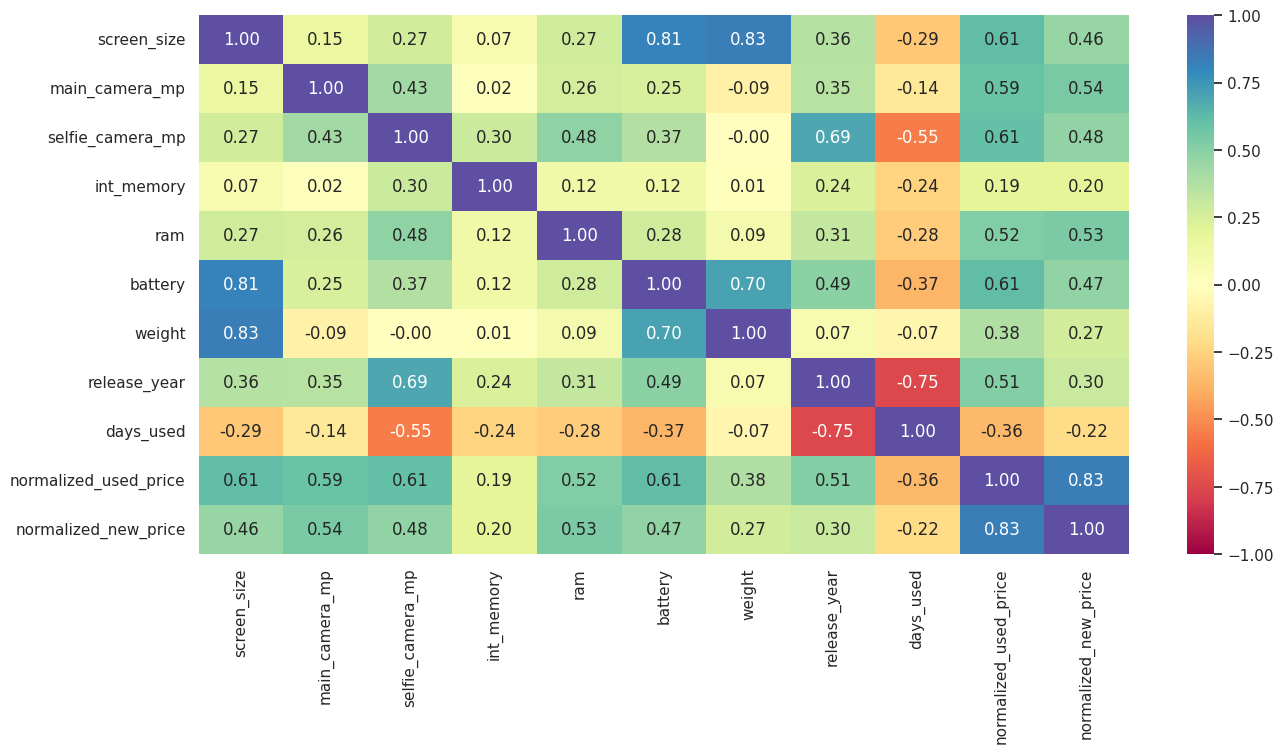

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

##Observations:

- used_price is highly correlated with new_price which means the higher the new price the higher the used price tends to increase.

- used_price also moderately correlated with ram and selfie_camera_mp meaning the higher the phone ram or selfie camera pixels the higher the price of the used phone.

- used_price is moderately correlated negatively with days_used which can mean that the longer the duration the phone was used the lower the price of such used phone.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df[col_to_fill] = df[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

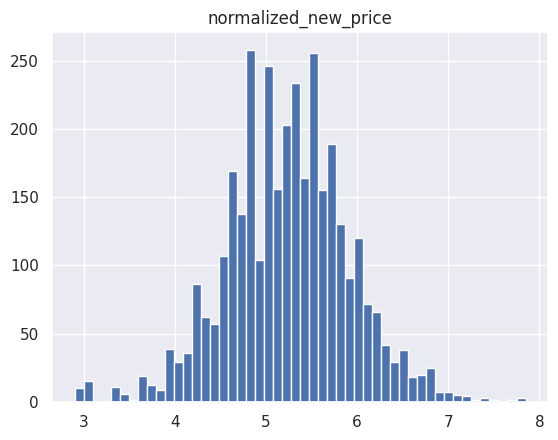

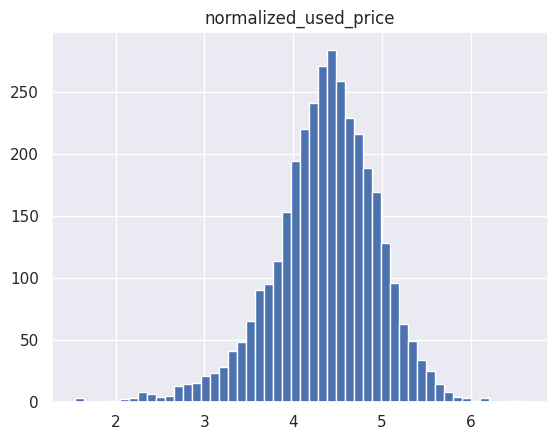

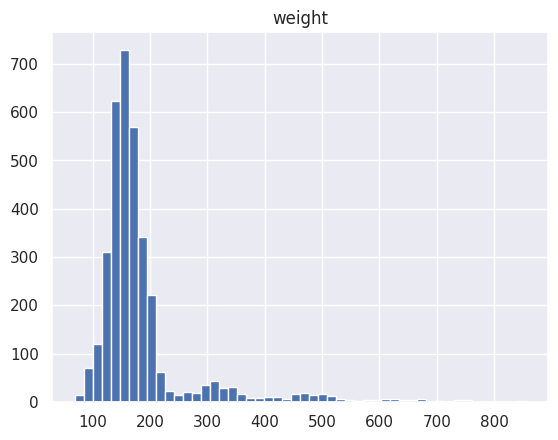

In [ ]:
cols_to_log = ["normalized_new_price", "normalized_used_price", "weight"]

for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()

In [ ]:
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname])

df.drop(cols_to_log, axis=1, inplace=True)

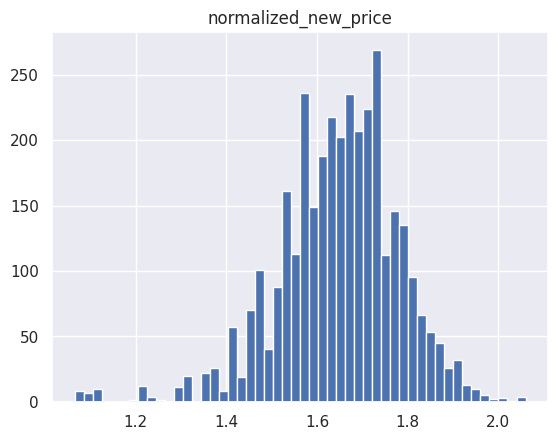

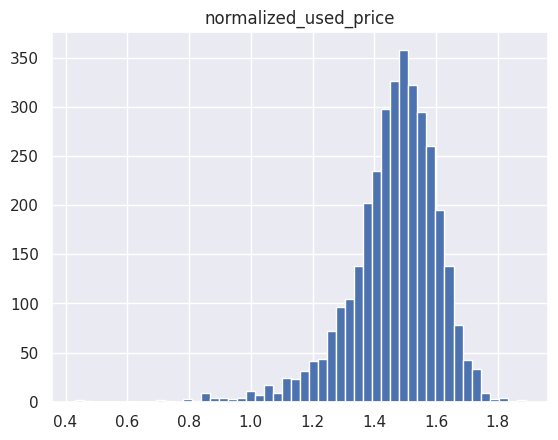

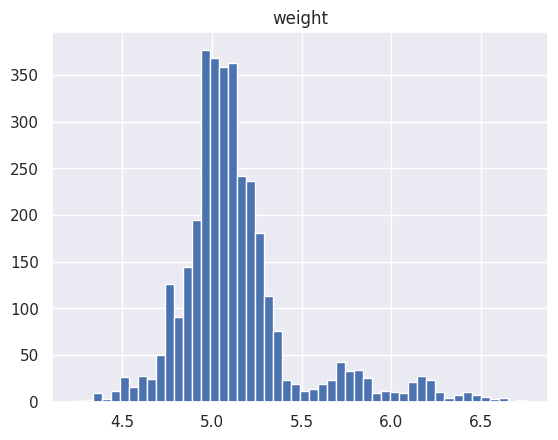

In [ ]:
for colname in cols_to_log:
    plt.hist(df[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df1 = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

In [ ]:
df1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_new_price_log,normalized_used_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.00,5.00,64.00,3.00,3020.00,2020,127,1.55,1.46,4.98,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.00,16.00,128.00,8.00,4300.00,2020,325,1.71,1.64,5.36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.00,8.00,128.00,8.00,4200.00,2020,162,1.77,1.63,5.36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,25.50,13.00,8.00,64.00,6.00,7250.00,2020,345,1.73,1.64,6.17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.00,8.00,64.00,3.00,5000.00,2020,293,1.60,1.48,5.22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


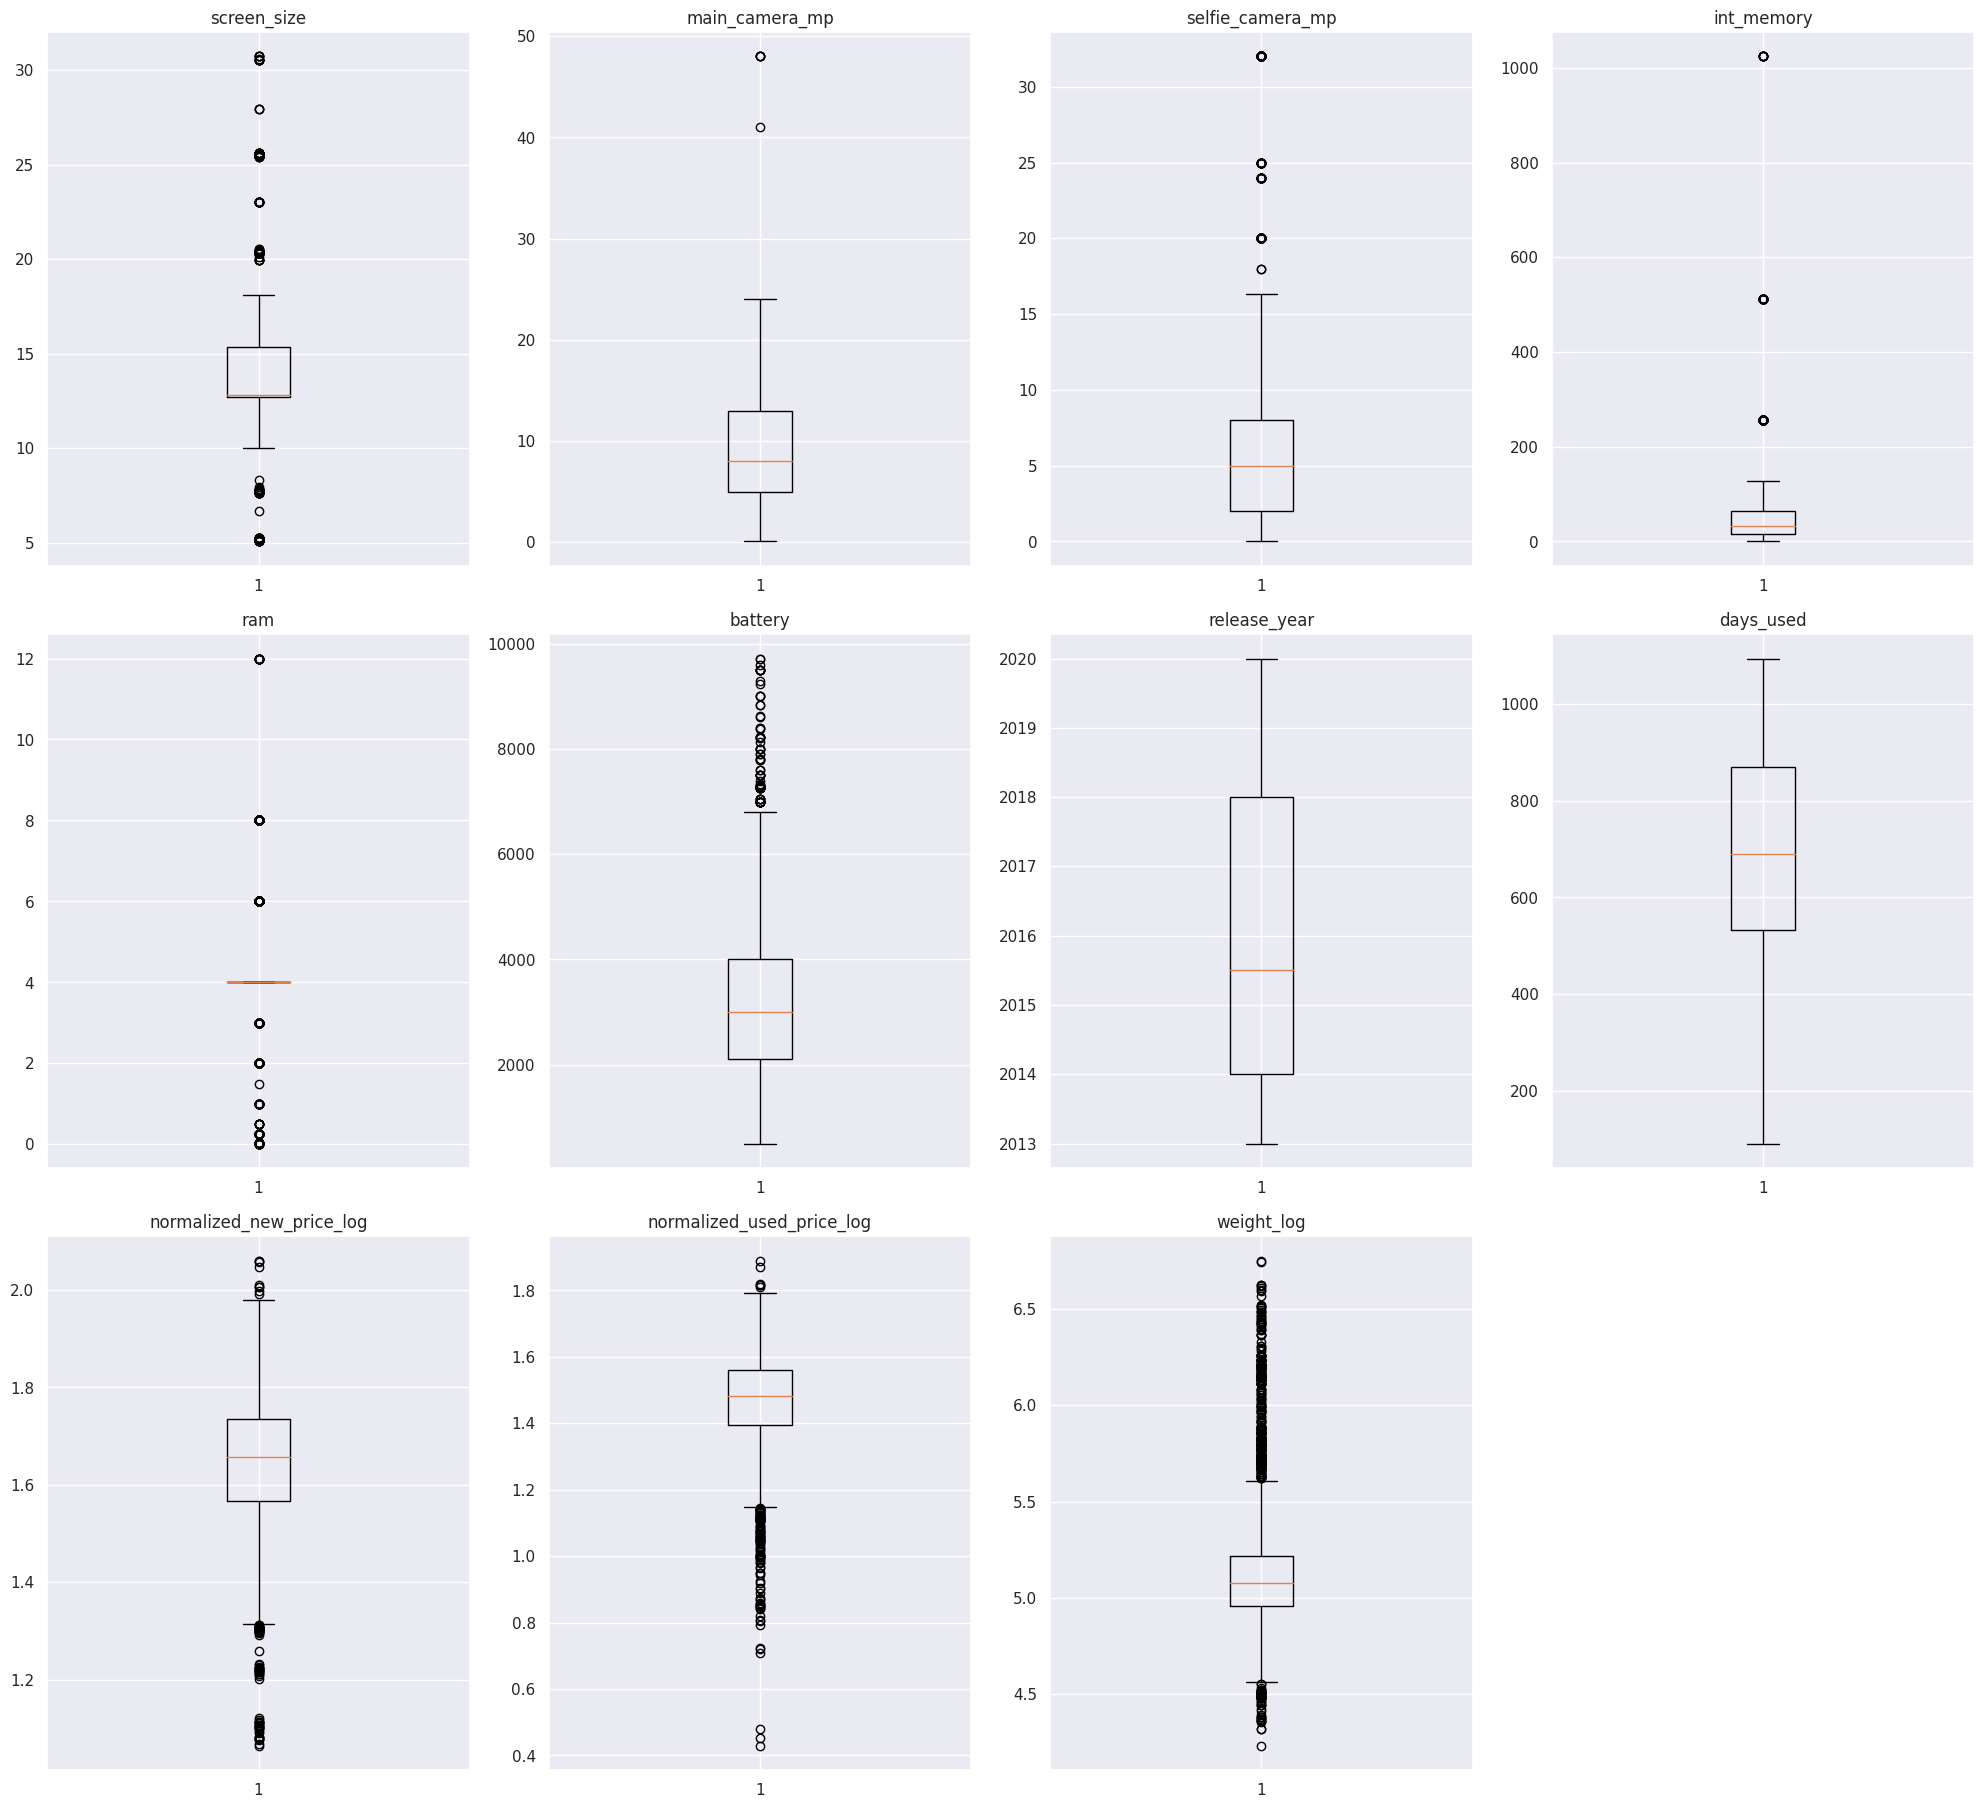

In [ ]:
plt.figure(figsize=(20, 30))

for i, var in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

##Observations:

- Outliers are present in all the numerical columns except for release_year and days_used.

- In this case we will not treat the outliers, since treating the outliers can lead to loss of information.

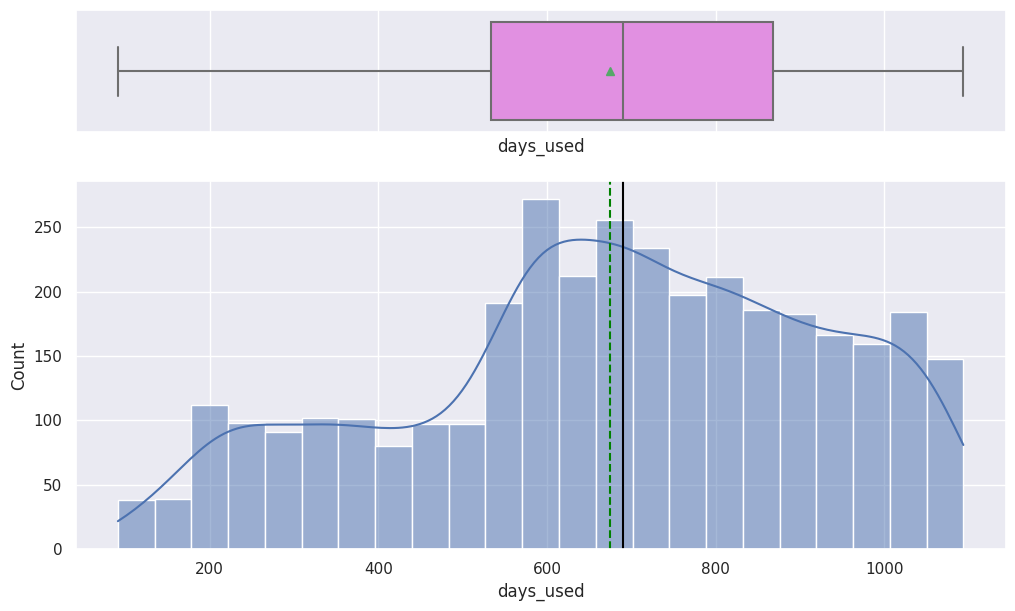

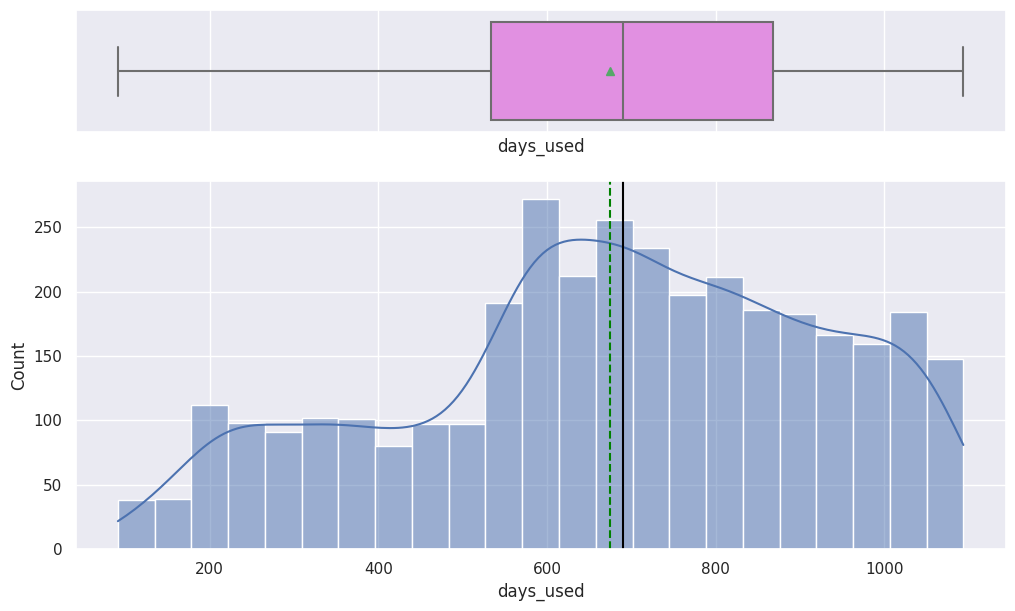

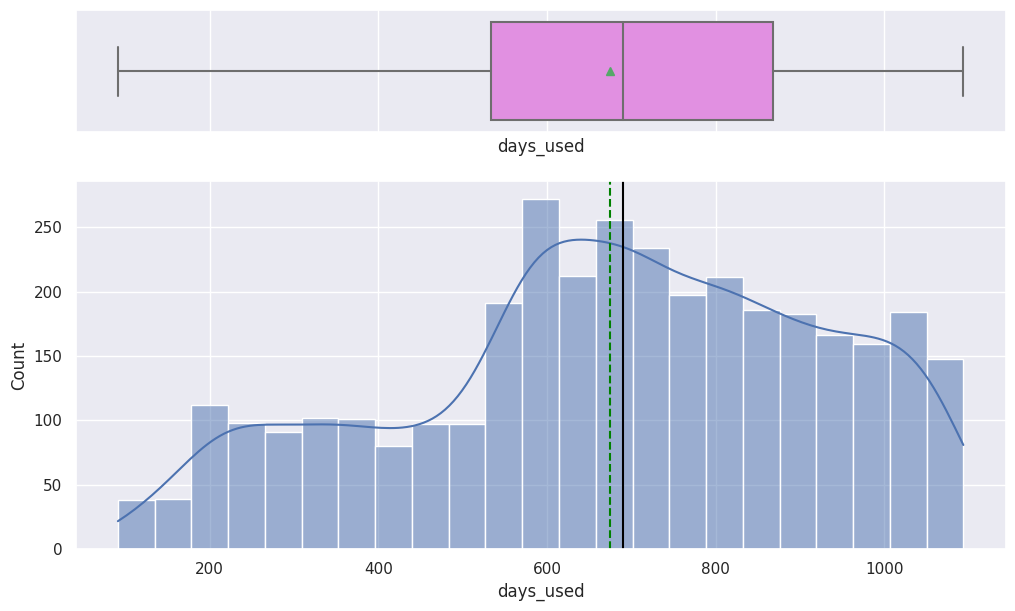

In [ ]:
for col in ["used_price_log", "new_price_log", "weight_log"]:
    histogram_boxplot(df, col)

## Model Building - Linear Regression

In [ ]:
X = df1.drop(["normalized_used_price_log"], axis=1)
y = df1["normalized_used_price_log"]

In [ ]:
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_new_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.00,5.00,64.00,3.00,3020.00,2020,127,1.55,4.98,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.00,16.00,128.00,8.00,4300.00,2020,325,1.71,5.36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.00,8.00,128.00,8.00,4200.00,2020,162,1.77,5.36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,25.50,13.00,8.00,64.00,6.00,7250.00,2020,345,1.73,6.17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.00,8.00,64.00,3.00,5000.00,2020,293,1.60,5.22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0   1.46
1   1.64
2   1.63
3   1.64
4   1.48
Name: normalized_used_price_log, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [ ]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],)

coef_df

,Coefficients
screen_size,0.01
main_camera_mp,0.01
selfie_camera_mp,0.00
int_memory,-0.00
ram,0.01
battery,-0.00
release_year,0.01
days_used,0.00
normalized_new_price_log,0.55
weight_log,0.06


## Model Performance Check

In [ ]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.06,0.04,0.84,0.84,3.14


In [ ]:
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.06,0.05,0.83,0.82,3.27


##Observations:

The training 𝑅2 is 84%, indicating that the model explains 83% of the variation in the train data. we can tell the model is not underfitted.

MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

MAE indicates that our current model is able to predict used price within a mean error of 0.05 euros on the test data.

MAPE on the test set suggests we can predict within 3.27% of the used price.

In [ ]:
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.840
Model:                                   OLS   Adj. R-squared:                  0.836
Method:                        Least Squares   F-statistic:                     258.5
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               22:36:15   Log-Likelihood:                 3426.2
No. Observations:                       2417   AIC:                            -6754.
Df Residuals:                           2368   BIC:                            -6471.
Df Model:                                 48                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train1)

,feature,VIF
0,const,3763803.01
1,screen_size,7.69
2,main_camera_mp,2.25
3,selfie_camera_mp,2.86
4,int_memory,1.33
5,ram,2.24
6,battery,4.07
7,release_year,4.79
8,days_used,2.58
9,normalized_new_price_log,3.33


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.84,0.06
1,brand_name_Apple,0.84,0.06
2,brand_name_LG,0.84,0.06
3,brand_name_Huawei,0.84,0.06
4,brand_name_Samsung,0.84,0.06
5,brand_name_Others,0.84,0.06


In [ ]:
col_to_drop = "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3763613.90
1,screen_size,7.69
2,main_camera_mp,2.25
3,selfie_camera_mp,2.86
4,int_memory,1.33
5,ram,2.24
6,battery,4.06
7,release_year,4.79
8,days_used,2.58
9,normalized_new_price_log,3.33


In [ ]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.84,0.06
1,os_iOS,0.84,0.06


In [ ]:
col_to_drop = "brand_name_Apple"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3757377.30
1,screen_size,7.61
2,main_camera_mp,2.25
3,selfie_camera_mp,2.83
4,int_memory,1.33
5,ram,2.23
6,battery,4.06
7,release_year,4.78
8,days_used,2.58
9,normalized_new_price_log,3.30


##Observation:

The above predictors have little to no multicollinearity and the assumption is satisfied.

In [ ]:
olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.840
Model:                                   OLS   Adj. R-squared:                  0.837
Method:                        Least Squares   F-statistic:                     269.7
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               22:40:41   Log-Likelihood:                 3425.4
No. Observations:                       2417   AIC:                            -6757.
Df Residuals:                           2370   BIC:                            -6485.
Df Model:                                 46                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [ ]:
cols = X_train3.columns.tolist()

max_p_value = 1

while len(cols) > 0:

    X_train_aux = X_train3[cols]

    model = sm.OLS(y_train, X_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'release_year', 'normalized_new_price_log', 'weight_log', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [ ]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.838
Model:                                   OLS   Adj. R-squared:                  0.837
Method:                        Least Squares   F-statistic:                     729.2
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               22:41:57   Log-Likelihood:                 3412.2
No. Observations:                       2417   AIC:                            -6788.
Df Residuals:                           2399   BIC:                            -6684.
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,1.45,1.45,-0.00
3141,1.43,1.35,0.08
1233,1.42,1.49,-0.07
3046,1.33,1.35,-0.02
2649,1.38,1.36,0.03


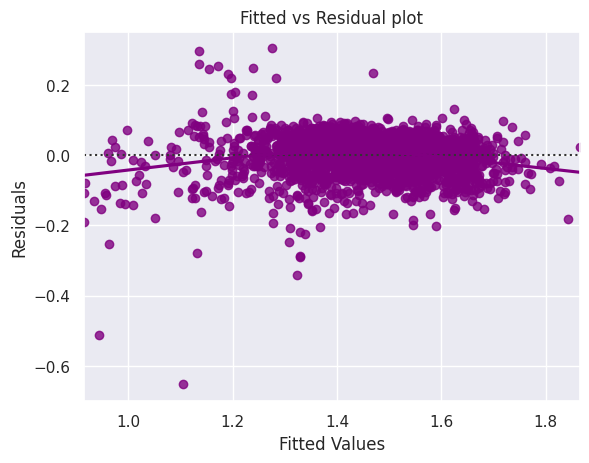

In [ ]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

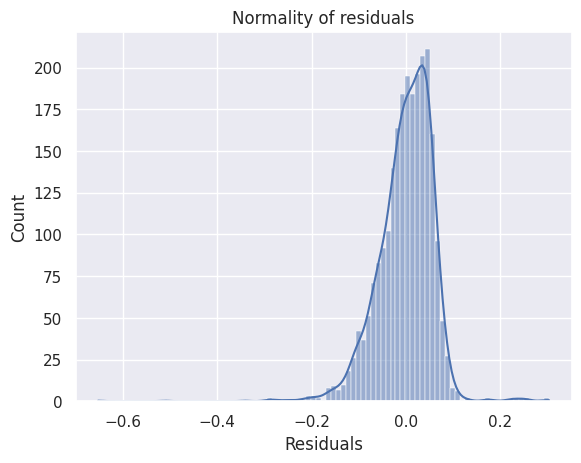

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

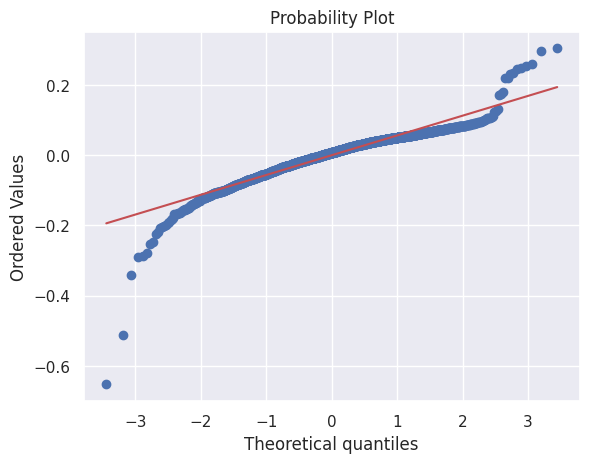

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.912406861782074, pvalue=3.0105236844024205e-35)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.8131431263976825), ('p-value', 0.9998177414214781)]

##Observation:

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

In [ ]:
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train4.columns[i], ")")

Used Phone Price = -13.3557 + ( 0.0064 )*( screen_size ) +  ( 0.0052 )*( main_camera_mp ) +  ( 0.0023 )*( selfie_camera_mp ) +  ( 0.0071 )*( ram ) +  ( -0.0 )*( battery ) +  ( 0.0067 )*( release_year ) +  ( 0.5393 )*( normalized_new_price_log ) +  ( 0.0562 )*( weight_log ) +  ( 0.0147 )*( brand_name_Asus ) +  ( 0.0298 )*( brand_name_BlackBerry ) +  ( -0.0594 )*( brand_name_Celkon ) +  ( 0.025 )*( brand_name_Nokia ) +  ( 0.0243 )*( brand_name_Realme ) +  ( 0.0228 )*( brand_name_Xiaomi ) +  ( -0.033 )*( os_Others ) +  ( 0.0101 )*( 4g_yes ) +  ( -0.0222 )*( 5g_yes )


In [ ]:
pred = olsmod2.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1174,1.52,1.50
2247,1.47,1.41
2991,1.43,1.40
2997,1.46,1.44
2982,1.54,1.51
479,1.46,1.44
17,1.56,1.55
471,1.55,1.50
2918,1.50,1.50
602,1.35,1.41


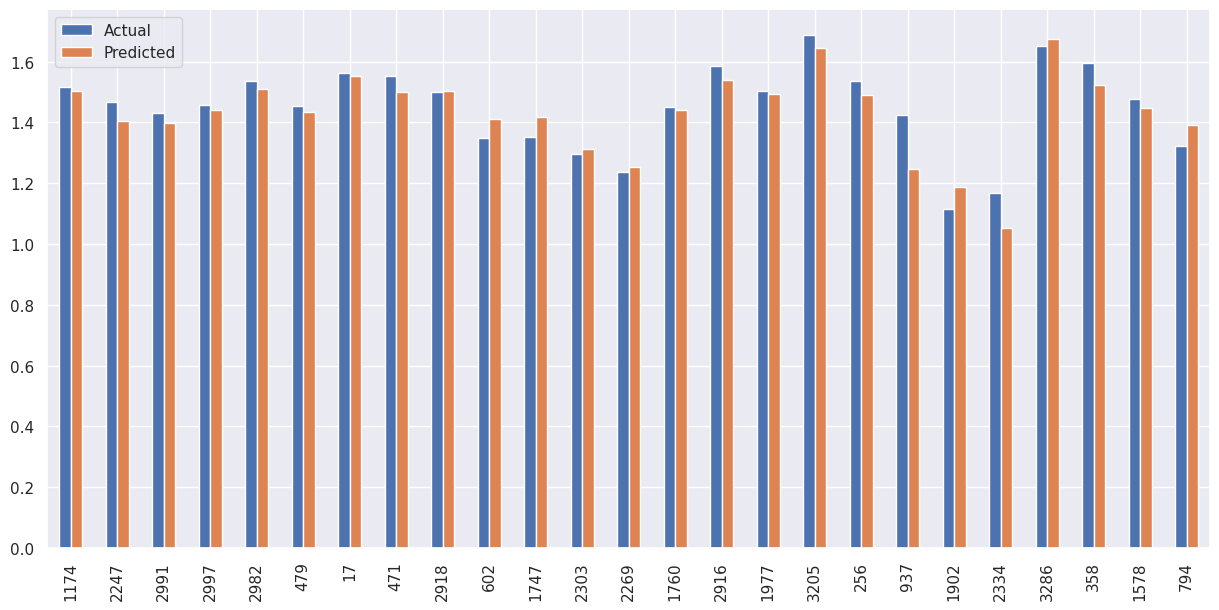

In [ ]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [ ]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.06,0.04,0.84,0.84,3.17


In [ ]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.06,0.05,0.83,0.82,3.27


In [ ]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.838
Model:                                   OLS   Adj. R-squared:                  0.837
Method:                        Least Squares   F-statistic:                     729.2
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               22:48:57   Log-Likelihood:                 3412.2
No. Observations:                       2417   AIC:                            -6788.
Df Residuals:                           2399   BIC:                            -6684.
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

## Actionable Insights and Recommendations

##Insights:

Newly released phones have high used price, which makes sense because the newer the phone, the higher the new price hence used price would be affected and the older the phone, the lower the used price. since most customers want phones in demand.

release_year, days_used, and normalized_new_price, whether 4g or 5g seem to be affect the used price. This is understandable the longer the phone is used, we cant determine its originality and its wholeness hence a decrease in used price which negatively impacts the amount it could be sold for used. 5g comes more with new phones, hence it would also shoot up in a high used price since its new.




___

##Recommendations:

We can use the model to make predictions of the price of used phone. Newly released phones should also be focused on as they have a high resale price.

Future data collections need to be done on the age of customers purchasing products, since age could be a major drive. millenial customers may tend to want a 5g or a newer version.

Future data collection on income could also be done to know what more high income customer want.

